## Shared Imports

In [1]:
from dataHandler.importer import updateDB
from config import NETWORK, USERNAME, DBFILE

import ipywidgets as widgets

import matplotlib.pyplot as plt

## Update Database

In [2]:
b = widgets.Button(description='Update Database',tooltip='call default updateDB()', icon='cloud-download')
display(b)
b.on_click(updateDB(DBFILE, NETWORK, USERNAME))

Button(description='Update Database', icon='cloud-download', style=ButtonStyle(), tooltip='call default update…

## Temporary Section

In [3]:
import pandas as pd
from dataHandler.models import Base, Scrobble
import datetime as dt

__create db session__

In [21]:
# this section should be made into a decorator
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
engine = create_engine(('sqlite:///' + DBFILE), echo=False)
Base.metadata.create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()

In [41]:
def plot_artist(artist):
    query = session.query(Scrobble).filter(Scrobble.artist == artist)
    df = pd.read_sql(query.statement,session.bind)
    df['timestamp'] = df['timestamp'].apply(lambda x: dt.datetime.utcfromtimestamp(int(x)))
    f_table = df.groupby(pd.Grouper(key='timestamp', freq='M'))['track'].count()
    
    plt.plot(f_table)
    plt.ylabel('Scrobbles / Month')
    plt.title('Scrobbles of `' + artist + '` per Month')
    x_ticks = f_table.index.values
    x_labels = f_table.index.month_name().values
    plt.xticks(x_ticks, x_labels, rotation=45)
    display(plt.show())

In [42]:
artist = ''
def set_artist(input):
    global artist
    artist = input.value

In [43]:
t = widgets.Text(description='Artist:')
display(t)
t.on_submit(set_artist)

Text(value='', description='Artist:')

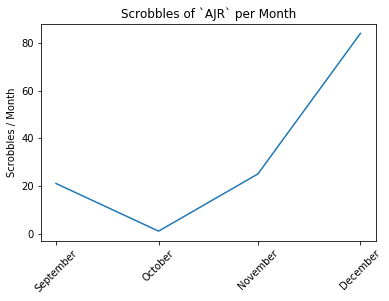

None

In [49]:
plot_artist(artist)

In [50]:
session.close()